# Planillas en Python con `pandas`

La biblioteca **`pandas`** permite trabajar de forma sencilla y eficiente con **planillas de datos**, como archivos **Excel (`.xlsx`)** o **CSV (`.csv`)**. Estas planillas se cargan en estructuras llamadas **DataFrames**, que son tablas con filas y columnas similares a una hoja de cálculo de Excel.


## Importar libreria

In [1]:
import pandas as pd

## Leer datos

Este fragmento de código lee un archivo de texto tabulado (`AWS_G.txt`) que contiene datos de una estación meteorológica automática (AWS). Se utiliza la función `pd.read_csv()` de `pandas` con los siguientes parámetros:

- `sep='\t'`: indica que el separador de columnas es una tabulación.
- `na_values='NAN'`: define que los valores `"NAN"` deben ser tratados como valores ausentes (`NaN`).

Luego, se muestra el contenido del DataFrame con `display(AWS_G)`.

In [2]:
filename = '../data/AWS_G.txt'
AWS_G = pd.read_csv(filename, sep='\t', na_values='NAN')
display(AWS_G)

,Fecha,Hora,RECORD,batt_volt_Min,logger_temp,SWin_Avg,SWout_Avg,LWin_Avg,LWout_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,LWin_corr_Avg,LWout_corr_Avg,Ta_Avg,Rh_Avg,WiSp,WiDi
0,6/1/2016,0:00:00,50084,12.85,NaN,NaN,2.630880,NaN,-12.32799,-0.751685,272.3983,NaN,299.8491,-0.053457,62.41208,1.609,103.30
1,6/1/2016,0:30:00,50085,12.82,NaN,NaN,2.017630,NaN,-11.88805,-1.136220,272.0138,NaN,298.5299,-0.659755,65.85472,2.315,102.50
2,6/1/2016,1:00:00,50086,12.80,NaN,NaN,2.786164,NaN,-12.34685,-1.279664,271.8703,NaN,297.4168,-0.570335,64.14788,1.734,101.10
3,6/1/2016,1:30:00,50087,12.79,NaN,NaN,2.471439,NaN,-13.14452,-1.291428,271.8586,NaN,296.5654,-1.037171,63.64153,2.011,102.40
4,6/1/2016,2:00:00,50088,12.78,NaN,NaN,2.321396,NaN,-13.34109,-1.382484,271.7675,NaN,295.9544,-0.944594,63.00742,2.079,102.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27303,1/23/2018,13:30:00,9078,16.56,0.777,1316.0,899.000000,-141.80,-63.81000,14.270000,287.4000,245.1,323.1000,3.342000,59.20355,4.996,48.78
27304,1/23/2018,14:00:00,9079,15.54,0.989,1218.0,846.000000,-130.40,-67.46000,15.060000,288.2000,260.8,323.8000,3.738000,55.85989,4.240,50.30
27305,1/23/2018,14:30:00,9080,15.09,0.946,501.2,373.500000,-79.75,-41.41000,9.750000,282.9000,283.6,321.9000,3.206000,60.50468,4.752,56.51
27306,1/23/2018,15:00:00,9081,14.69,0.883,435.0,337.200000,-60.31,-32.62000,7.612000,280.8000,292.0,319.7000,3.215000,60.65454,3.907,59.01


Este comando genera un gráfico de línea con la serie temporal **`Ta_Avg`** (temperatura promedio) del DataFrame `AWS_G`:

<Axes: >

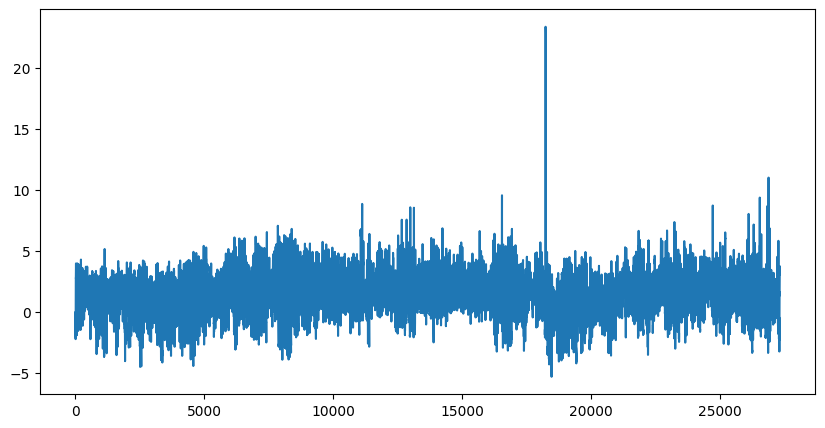

In [3]:
AWS_G['Ta_Avg'].plot(figsize=(10,5))

In [4]:
## Informacion del dataframe
AWS_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27308 entries, 0 to 27307
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha           27308 non-null  object 
 1   Hora            27308 non-null  object 
 2   RECORD          27308 non-null  int64  
 3   batt_volt_Min   27308 non-null  float64
 4   logger_temp     9088 non-null   float64
 5   SWin_Avg        9083 non-null   float64
 6   SWout_Avg       27306 non-null  float64
 7   LWin_Avg        11478 non-null  float64
 8   LWout_Avg       27306 non-null  float64
 9   cnr4_T_C_Avg    27306 non-null  float64
 10  cnr4_T_K_Avg    27306 non-null  float64
 11  LWin_corr_Avg   11478 non-null  float64
 12  LWout_corr_Avg  27306 non-null  float64
 13  Ta_Avg          27308 non-null  float64
 14  Rh_Avg          27263 non-null  float64
 15  WiSp            27308 non-null  float64
 16  WiDi            27308 non-null  float64
dtypes: float64(14), int64(1), objec

## Juntar fecha y hora

Este fragmento de código separa las columnas de fecha y hora del DataFrame `AWS_G` en componentes individuales:

In [5]:
AWS_G[['month', 'day', 'year']] = AWS_G['Fecha'].str.split('/', expand=True)
AWS_G[['hour', 'minute', 'second']] = AWS_G['Hora'].str.split(':', expand=True)
AWS_G

,Fecha,Hora,RECORD,batt_volt_Min,logger_temp,SWin_Avg,SWout_Avg,LWin_Avg,LWout_Avg,cnr4_T_C_Avg,...,Ta_Avg,Rh_Avg,WiSp,WiDi,month,day,year,hour,minute,second
0,6/1/2016,0:00:00,50084,12.85,NaN,NaN,2.630880,NaN,-12.32799,-0.751685,...,-0.053457,62.41208,1.609,103.30,6,1,2016,0,00,00
1,6/1/2016,0:30:00,50085,12.82,NaN,NaN,2.017630,NaN,-11.88805,-1.136220,...,-0.659755,65.85472,2.315,102.50,6,1,2016,0,30,00
2,6/1/2016,1:00:00,50086,12.80,NaN,NaN,2.786164,NaN,-12.34685,-1.279664,...,-0.570335,64.14788,1.734,101.10,6,1,2016,1,00,00
3,6/1/2016,1:30:00,50087,12.79,NaN,NaN,2.471439,NaN,-13.14452,-1.291428,...,-1.037171,63.64153,2.011,102.40,6,1,2016,1,30,00
4,6/1/2016,2:00:00,50088,12.78,NaN,NaN,2.321396,NaN,-13.34109,-1.382484,...,-0.944594,63.00742,2.079,102.30,6,1,2016,2,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27303,1/23/2018,13:30:00,9078,16.56,0.777,1316.0,899.000000,-141.80,-63.81000,14.270000,...,3.342000,59.20355,4.996,48.78,1,23,2018,13,30,00
27304,1/23/2018,14:00:00,9079,15.54,0.989,1218.0,846.000000,-130.40,-67.46000,15.060000,...,3.738000,55.85989,4.240,50.30,1,23,2018,14,00,00
27305,1/23/2018,14:30:00,9080,15.09,0.946,501.2,373.500000,-79.75,-41.41000,9.750000,...,3.206000,60.50468,4.752,56.51,1,23,2018,14,30,00
27306,1/23/2018,15:00:00,9081,14.69,0.883,435.0,337.200000,-60.31,-32.62000,7.612000,...,3.215000,60.65454,3.907,59.01,1,23,2018,15,00,00


Este comando crea una nueva columna llamada **`fecha_hora`** en el DataFrame `AWS_G`, combinando las columnas de fecha y hora en un único objeto de tipo `datetime`:

In [6]:
AWS_G['fecha_hora'] = pd.to_datetime(AWS_G[['year', 'month', 'day', 'hour', 'minute', 'second']].astype(int))

In [7]:
## Información
AWS_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27308 entries, 0 to 27307
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           27308 non-null  object        
 1   Hora            27308 non-null  object        
 2   RECORD          27308 non-null  int64         
 3   batt_volt_Min   27308 non-null  float64       
 4   logger_temp     9088 non-null   float64       
 5   SWin_Avg        9083 non-null   float64       
 6   SWout_Avg       27306 non-null  float64       
 7   LWin_Avg        11478 non-null  float64       
 8   LWout_Avg       27306 non-null  float64       
 9   cnr4_T_C_Avg    27306 non-null  float64       
 10  cnr4_T_K_Avg    27306 non-null  float64       
 11  LWin_corr_Avg   11478 non-null  float64       
 12  LWout_corr_Avg  27306 non-null  float64       
 13  Ta_Avg          27308 non-null  float64       
 14  Rh_Avg          27263 non-null  float64       
 15  Wi

Este comando genera un gráfico de línea utilizando el DataFrame `AWS_G`, donde:

<Axes: xlabel='fecha_hora'>

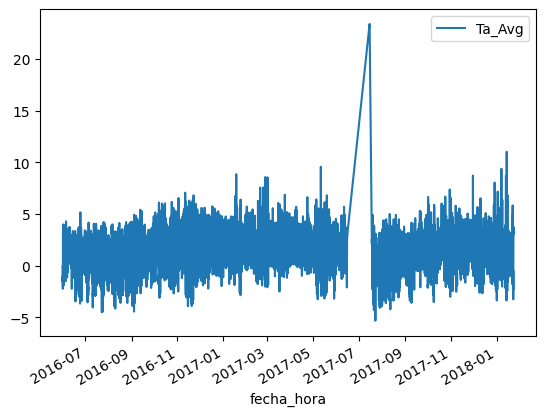

In [8]:
AWS_G.plot(x='fecha_hora', y='Ta_Avg')

## Crear una columna con fecha_hora completas

Esta sección crea un rango completo de fechas y horas con intervalos regulares para generar un DataFrame con filas completas de tiempo:

In [9]:
fechas_com = pd.date_range(start='2016-06-01 00:00:00', end='2018-01-23 15:30:00', freq='30min')
fechas_com

DatetimeIndex(['2016-06-01 00:00:00', '2016-06-01 00:30:00',
               '2016-06-01 01:00:00', '2016-06-01 01:30:00',
               '2016-06-01 02:00:00', '2016-06-01 02:30:00',
               '2016-06-01 03:00:00', '2016-06-01 03:30:00',
               '2016-06-01 04:00:00', '2016-06-01 04:30:00',
               ...
               '2018-01-23 11:00:00', '2018-01-23 11:30:00',
               '2018-01-23 12:00:00', '2018-01-23 12:30:00',
               '2018-01-23 13:00:00', '2018-01-23 13:30:00',
               '2018-01-23 14:00:00', '2018-01-23 14:30:00',
               '2018-01-23 15:00:00', '2018-01-23 15:30:00'],
              dtype='datetime64[ns]', length=28880, freq='30min')

Crear un dataframe con fecha_hora:

In [10]:
df1 = pd.DataFrame({'fecha_hora':fechas_com})
df1

,fecha_hora
0,2016-06-01 00:00:00
1,2016-06-01 00:30:00
2,2016-06-01 01:00:00
3,2016-06-01 01:30:00
4,2016-06-01 02:00:00
...,...
28875,2018-01-23 13:30:00
28876,2018-01-23 14:00:00
28877,2018-01-23 14:30:00
28878,2018-01-23 15:00:00


### Fusión de DataFrames por columna temporal

Se realiza una **fusión (`merge`)** entre dos DataFrames: `df1` y `AWS_G`.

La combinación se hace utilizando la columna **`fecha_hora`** como clave común (`on='fecha_hora'`).

El parámetro **`how='left'`** indica que se trata de una **unión por la izquierda**, lo que significa:

- Se mantienen **todas las filas de `df1`**.
- Se añaden las columnas de `AWS_G` que **coincidan** en fecha y hora.
- Si no hay coincidencia, se insertan valores **`NaN`**.

Este tipo de operación es útil para enriquecer un conjunto de datos base (`df1`) con información meteorológica u observacional proveniente de `AWS_G`, respetando la estructura temporal del DataFrame original.

In [11]:
# Concatenar el dataframe de datos con el dataframe completo

df_merged = pd.merge(df1, AWS_G, on='fecha_hora', how='left')
df_merged

,fecha_hora,Fecha,Hora,RECORD,batt_volt_Min,logger_temp,SWin_Avg,SWout_Avg,LWin_Avg,LWout_Avg,...,Ta_Avg,Rh_Avg,WiSp,WiDi,month,day,year,hour,minute,second
0,2016-06-01 00:00:00,6/1/2016,0:00:00,50084.0,12.85,NaN,NaN,2.630880,NaN,-12.32799,...,-0.053457,62.41208,1.609,103.30,6,1,2016,0,00,00
1,2016-06-01 00:30:00,6/1/2016,0:30:00,50085.0,12.82,NaN,NaN,2.017630,NaN,-11.88805,...,-0.659755,65.85472,2.315,102.50,6,1,2016,0,30,00
2,2016-06-01 01:00:00,6/1/2016,1:00:00,50086.0,12.80,NaN,NaN,2.786164,NaN,-12.34685,...,-0.570335,64.14788,1.734,101.10,6,1,2016,1,00,00
3,2016-06-01 01:30:00,6/1/2016,1:30:00,50087.0,12.79,NaN,NaN,2.471439,NaN,-13.14452,...,-1.037171,63.64153,2.011,102.40,6,1,2016,1,30,00
4,2016-06-01 02:00:00,6/1/2016,2:00:00,50088.0,12.78,NaN,NaN,2.321396,NaN,-13.34109,...,-0.944594,63.00742,2.079,102.30,6,1,2016,2,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28875,2018-01-23 13:30:00,1/23/2018,13:30:00,9078.0,16.56,0.777,1316.0,899.000000,-141.80,-63.81000,...,3.342000,59.20355,4.996,48.78,1,23,2018,13,30,00
28876,2018-01-23 14:00:00,1/23/2018,14:00:00,9079.0,15.54,0.989,1218.0,846.000000,-130.40,-67.46000,...,3.738000,55.85989,4.240,50.30,1,23,2018,14,00,00
28877,2018-01-23 14:30:00,1/23/2018,14:30:00,9080.0,15.09,0.946,501.2,373.500000,-79.75,-41.41000,...,3.206000,60.50468,4.752,56.51,1,23,2018,14,30,00
28878,2018-01-23 15:00:00,1/23/2018,15:00:00,9081.0,14.69,0.883,435.0,337.200000,-60.31,-32.62000,...,3.215000,60.65454,3.907,59.01,1,23,2018,15,00,00


<Axes: xlabel='fecha_hora'>

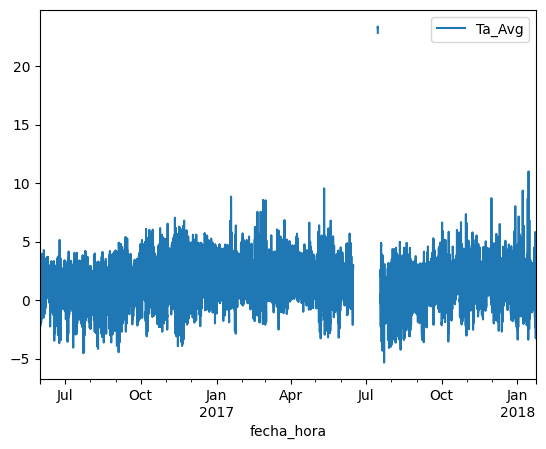

In [12]:
## Graficando
df_merged.plot(x='fecha_hora', y='Ta_Avg')

## Promedio datos 1h

### Promediar temperatura a resolución horaria


- **`.set_index('fecha_hora')`**: establece la columna `fecha_hora` como índice temporal, lo que permite aplicar operaciones basadas en tiempo.

- **`.resample('1h')`**: agrupa los datos en intervalos de **1 hora**, preparando la serie para realizar agregaciones por bloques horarios.

- **`.mean()`**: calcula el **promedio** de los valores dentro de cada intervalo de 1 hora.

- **`.reset_index()`**: restaura el **índice numérico** original, convirtiendo `fecha_hora` nuevamente en una columna regular.


In [13]:
df_T2 = df_merged[['fecha_hora', 'Ta_Avg']]
df_T2_h = df_T2.set_index('fecha_hora').resample('1h').mean().reset_index()
df_T2_h

,fecha_hora,Ta_Avg
0,2016-06-01 00:00:00,-0.356606
1,2016-06-01 01:00:00,-0.803753
2,2016-06-01 02:00:00,-1.104493
3,2016-06-01 03:00:00,-1.351831
4,2016-06-01 04:00:00,-1.227747
...,...,...
14435,2018-01-23 11:00:00,2.016000
14436,2018-01-23 12:00:00,2.846000
14437,2018-01-23 13:00:00,3.244000
14438,2018-01-23 14:00:00,3.472000


## Guardar datos en .csv

### Exportar DataFrame a archivo `.csv`

**Descripción:**

- `df_T2_h.to_csv()`: guarda el DataFrame `df_T2_h` en un archivo `.csv`.

**Parámetros utilizados:**

- `'data/AWS_G_T2.csv'`: ruta y nombre del archivo de salida.
- `sep='\t'`: define el separador de columnas como **tabulación** (formato `.tsv`).
- `index=False`: evita que se guarde el **índice numérico** del DataFrame como una columna adicional.

In [15]:
df_T2_h.to_csv('../data/AWS_G_T2.csv', sep='\t', index=False)

## Crear un función para completar fecha_hora

In [16]:
def completar_tiempo(df, t1='2016-06-01 00:00:00', t2='2018-01-23 15:30:00'):
    """
    Esta funcion crea un dataframe con el fecha y hora completo

    Parametros:

    df : DataFrame con datos de estacion meteorologica automatica.

    Retorna:

    df : Dataframe con la fecha y tiempo completo

    """

    df[['month', 'day', 'year']] = df['Fecha'].str.split('/', expand=True)
    df[['hour', 'minute', 'second']] = df['Hora'].str.split(':', expand=True)
    df['fecha_hora'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']].astype(int))
    fechas_com = pd.date_range(start=t1, end=t2, freq='30min')
    df1 = pd.DataFrame({'fecha_hora':fechas_com})

    df_merged = pd.merge(df1, df, on='fecha_hora', how='left')

    return df_merged

## Leer datos de la AWS de morrena

In [17]:
filename = '../data/AWS_M.txt'
AWS_M = pd.read_csv(filename, sep='\t', na_values='NAN')
display(AWS_M)

,Fecha,Hora,RECORD,batt_volt_Min,logger_temp,SWin_Avg,Ta_Avg,Rh_Avg,WiSp,WiDi,pressure,precip_Tot
0,6/1/2016,0:00:00,53446,12.73,-1.288,-0.271499,1.484400,66.59111,0.894,122.70,747.9,0.0
1,6/1/2016,0:30:00,53447,12.70,-1.652,-0.086088,0.742872,68.57442,1.509,86.10,747.3,0.0
2,6/1/2016,1:00:00,53448,12.68,-2.013,-0.132451,0.491383,67.66154,1.000,87.80,747.0,0.0
3,6/1/2016,1:30:00,53449,12.66,-2.185,-0.115895,0.688429,62.95418,1.385,94.90,747.0,0.0
4,6/1/2016,2:00:00,53450,12.65,-2.400,-0.016556,0.215762,65.92380,1.447,94.50,746.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28873,1/23/2018,12:30:00,82319,13.97,5.377,1092.188000,3.096449,66.79238,7.642,61.69,744.1,0.0
28874,1/23/2018,13:00:00,82320,13.99,5.896,1318.121000,3.712059,63.15574,7.511,67.77,743.4,0.0
28875,1/23/2018,13:30:00,82321,13.98,6.897,1323.438000,4.246994,59.54168,6.085,59.51,743.1,0.0
28876,1/23/2018,14:00:00,82322,13.96,8.550,1277.450000,4.872331,56.19498,4.824,56.97,742.4,0.0


Usando la funcion completar_tiempo.

In [18]:
AWS_M_com = completar_tiempo(AWS_M, t1='2016-06-01 00:00:00', t2='2018-01-23 14:30:00')

In [19]:
AWS_M_com

,fecha_hora,Fecha,Hora,RECORD,batt_volt_Min,logger_temp,SWin_Avg,Ta_Avg,Rh_Avg,WiSp,WiDi,pressure,precip_Tot,month,day,year,hour,minute,second
0,2016-06-01 00:00:00,6/1/2016,0:00:00,53446,12.73,-1.288,-0.271499,1.484400,66.59111,0.894,122.70,747.9,0.0,6,1,2016,0,00,00
1,2016-06-01 00:30:00,6/1/2016,0:30:00,53447,12.70,-1.652,-0.086088,0.742872,68.57442,1.509,86.10,747.3,0.0,6,1,2016,0,30,00
2,2016-06-01 01:00:00,6/1/2016,1:00:00,53448,12.68,-2.013,-0.132451,0.491383,67.66154,1.000,87.80,747.0,0.0,6,1,2016,1,00,00
3,2016-06-01 01:30:00,6/1/2016,1:30:00,53449,12.66,-2.185,-0.115895,0.688429,62.95418,1.385,94.90,747.0,0.0,6,1,2016,1,30,00
4,2016-06-01 02:00:00,6/1/2016,2:00:00,53450,12.65,-2.400,-0.016556,0.215762,65.92380,1.447,94.50,746.7,0.0,6,1,2016,2,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28873,2018-01-23 12:30:00,1/23/2018,12:30:00,82319,13.97,5.377,1092.188000,3.096449,66.79238,7.642,61.69,744.1,0.0,1,23,2018,12,30,00
28874,2018-01-23 13:00:00,1/23/2018,13:00:00,82320,13.99,5.896,1318.121000,3.712059,63.15574,7.511,67.77,743.4,0.0,1,23,2018,13,00,00
28875,2018-01-23 13:30:00,1/23/2018,13:30:00,82321,13.98,6.897,1323.438000,4.246994,59.54168,6.085,59.51,743.1,0.0,1,23,2018,13,30,00
28876,2018-01-23 14:00:00,1/23/2018,14:00:00,82322,13.96,8.550,1277.450000,4.872331,56.19498,4.824,56.97,742.4,0.0,1,23,2018,14,00,00


### selecionando y promediando a 1h

In [20]:
df_M_T2 = AWS_M_com[['fecha_hora', 'Ta_Avg']]
df_T2_M_h = df_M_T2.set_index('fecha_hora').resample('1h').mean().reset_index()
df_T2_M_h

,fecha_hora,Ta_Avg
0,2016-06-01 00:00:00,1.113636
1,2016-06-01 01:00:00,0.589906
2,2016-06-01 02:00:00,0.103807
3,2016-06-01 03:00:00,0.156244
4,2016-06-01 04:00:00,0.214754
...,...,...
14434,2018-01-23 10:00:00,1.833746
14435,2018-01-23 11:00:00,2.589166
14436,2018-01-23 12:00:00,3.048399
14437,2018-01-23 13:00:00,3.979526


### Guardando

In [21]:
df_T2_M_h.to_csv('../data/AWS_M_T2.csv', sep='\t', index=False)